In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Loading

In [19]:
df = pd.read_csv("../data/gold-features.csv")
df["energy_norm"] = (df["energy"] - df["energy"].min()) / (df["energy"].max() - df["energy"].min()) * 50

df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,file_name,energy,energy_norm
0,8.312640,0.013240,0.002026,0.000578,0.000059,0.000005,3.614525e-07,2.891632e-08,3.363042e-09,9.584413e-11,0.xyz,-1547.657785,18.158321
1,8.903285,0.026071,0.002458,0.000283,0.000031,0.000006,1.041832e-06,4.556548e-08,2.465568e-09,8.548989e-11,1.xyz,-1552.612539,8.739029
2,9.287031,0.033807,0.002167,0.000183,0.000028,0.000006,1.474569e-06,6.771517e-08,1.839670e-09,8.525103e-11,10.xyz,-1555.417784,3.406086
3,8.923366,0.023786,0.001960,0.000339,0.000035,0.000007,9.650267e-07,5.893078e-08,2.394213e-09,1.202439e-10,100.xyz,-1552.217633,9.489770
4,9.086140,0.026782,0.001243,0.000245,0.000049,0.000005,1.253184e-06,4.471700e-08,3.935182e-09,1.254421e-10,101.xyz,-1552.886542,8.218132


## Descriptive Statistics

In [20]:
print(f"Mean: {np.mean(df['energy']):.4f}")
print(f"Var : {np.var(df['energy']):.4f}")
print(f"Skew: {sp.stats.skew(df['energy']):.4f}")
print(f"Kurt: {sp.stats.kurtosis(df['energy']):.4f}")

Mean: -1551.2496
Var : 8.2602
Skew: 1.1522
Kurt: 3.2105


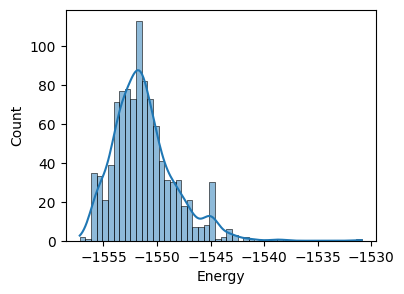

In [21]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.histplot(df['energy'], kde=True, bins=50, ax=ax)
ax.set_xlabel("Energy")

plt.show()

## Dimensionality Reduction: PCA

In [22]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(StandardScaler().fit_transform(df.iloc[:, :10]))

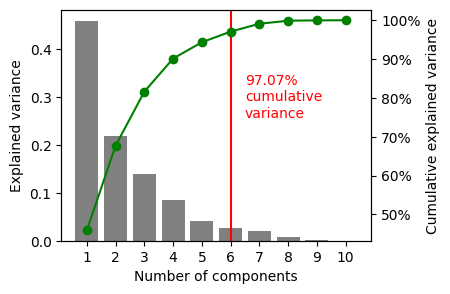

In [23]:
fig, ax = plt.subplots(figsize=(4, 3))

pc_idx = np.arange(1, pca.explained_variance_ratio_.shape[0]+1)
pc_var_cumsum = np.cumsum(pca.explained_variance_ratio_)
pca_var_95_idx = np.argmax(pc_var_cumsum >= 0.95)

ax.bar(pc_idx, pca.explained_variance_ratio_, color="gray")
ax.axvline(pca_var_95_idx+1, c="red", label="96% variance")
ax.text(pca_var_95_idx+1.5, 0.30, f"{pc_var_cumsum[pca_var_95_idx]*100:.2f}%\ncumulative\nvariance", color="red", ha="left", va="center")
ax.set_xticks(pc_idx)
ax.set_xlabel("Number of components")
ax.set_ylabel("Explained variance")

ax2 = ax.twinx()
ax2.plot(pc_idx, pc_var_cumsum, c="green", marker="o")
ax2.set_ylabel("Cumulative explained variance")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.show()

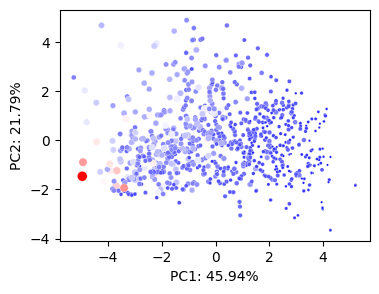

In [24]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=df['energy_norm'], c=df['energy'], cmap="bwr", ax=ax)
ax.set_xlabel(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
ax.set_ylabel(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")

plt.show()

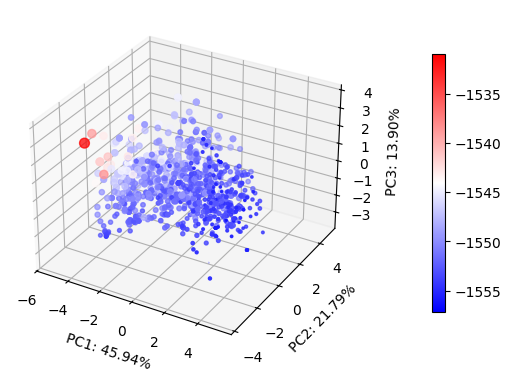

In [25]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=df['energy_norm'], c=df['energy'], cmap="bwr")

# xx, zz = np.meshgrid(np.linspace(12, -2, 20), np.linspace(-20, 20, 20))
# yy = np.meshgrid(np.linspace(-20, 40, 20), np.linspace(-20, 40, 20))[0]
# ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_xlabel(f"PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
ax.set_ylabel(f"PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
ax.set_zlabel(f"PC3: {pca.explained_variance_ratio_[2]*100:.2f}%")

plt.colorbar(sc, shrink=0.7, pad=0.15)
plt.show()